In [118]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

- X: Firmicutes
- Y: Bacteroidetes

In [119]:
α1 = 0.2
α2 = 0.2
β1 = 0.0001
β2 = 0.0001
k1 = 400
k2 = 400
x0 = 1000
y0 = 20

In [120]:
def model_1_bact_firm(c, t):
    x=c[0] # Firmicutes
    y=c[1] # Bacteroidetes 
    dxdt = α1*x*(1-x/k1) + β1*x*y
    dydt = α2*y*(1-y/k2) + β2*x*y
    return np.array([dxdt,dydt])

tmax = 100
dt = 0.1
t = np.arange(0,tmax,dt)

c0 = np.array([x0 , y0])

solution = odeint(model_1_bact_firm, c0, t)

In [121]:
x1 = solution[tmax, 0]
y1 = solution[tmax, 1]

R = x1/y1
print(R)

2.567346896339859


Text(0, 0.5, 'Bacterias')

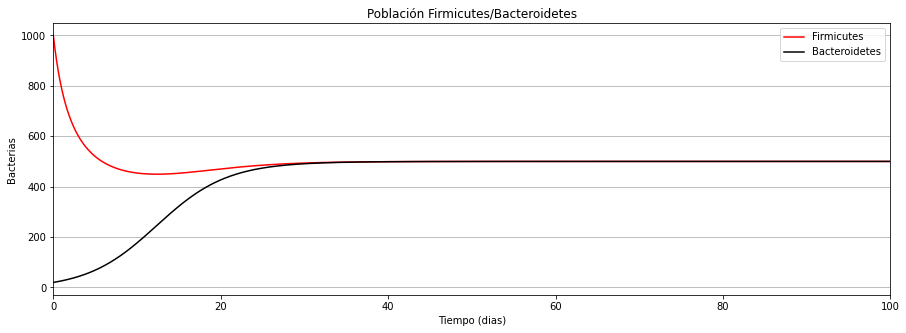

In [122]:
# fig, ax = plt.subplots(figsize=(7, 3)) # Best to paper
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(t, solution[:,0], color='red', label='Firmicutes')
plt.plot(t, solution[:,1], color='black', label='Bacteroidetes')
plt.legend(loc=1)
plt.xlim(0, tmax)
plt.grid(True, axis='y')
plt.title('Población Firmicutes/Bacteroidetes')
plt.xlabel('Tiempo (dias)')
plt.ylabel('Bacterias')
# plt.savefig('Dialisis_toxina.eps', dpi=400, bbox_inches = "tight")

In [123]:
α3 = 0.2
k3 = 400
β3 = 0.0001
z0 = 100

def model_2_bact_firm(c, t):
    x = c[0] # Firmicutes
    y = c[1] # Bacteroidetes 
    z = c[2] # Otros
    dxdt = (1 - x/k1)*α1*x + (y*β1 + z*β3)*x
    dydt = y*(-y/k2 + 1)*α2 + y*(z*β3 + β1*x)
    dzdt = z*(y*β2 + β1*x) + z*(-z/k3 + 1)*α3
    return np.array([dxdt,dydt, dzdt])

tmax = 100
dt = 0.1
t=np.arange(0,tmax,dt)

c0 = np.array([x0 , y0, z0])

solution = odeint(model_2_bact_firm, c0, t)

Text(0, 0.5, 'Bacterias')

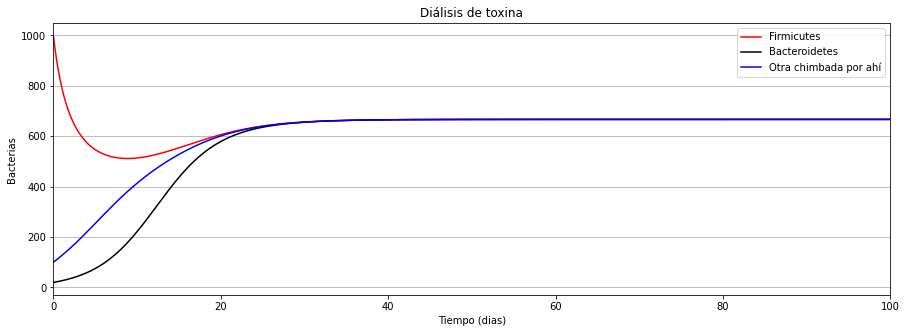

In [124]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(t, solution[:,0], color='red', label='Firmicutes')
plt.plot(t, solution[:,1], color='black', label='Bacteroidetes')
plt.plot(t, solution[:,2], color='blue', label='Otra chimbada por ahí')
plt.legend(loc=1)
plt.xlim(0, tmax)
plt.grid(True, axis='y')
plt.title('Diálisis de toxina')
plt.xlabel('Tiempo (dias)')
plt.ylabel('Bacterias')
# plt.savefig('Dialisis_toxina.eps', dpi=400, bbox_inches = "tight")